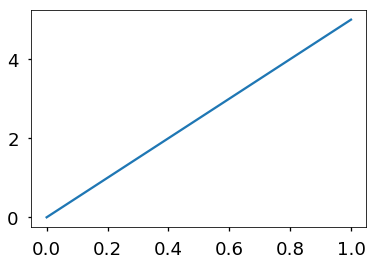

In [33]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk", font_scale = 1.4)

X = np.linspace(0.,1, 2)[:,None]
X_prime = np.linspace(0, 1, 3)[:,None]
Y = 5*X

plt.plot(X, Y)

In [34]:
k = gpflow.kernels.RBF(1)
m = gpflow.gpr.GPR(X, Y, k)
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = True

In [35]:
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)

In [36]:
m.optimize(maxiter=150)
m

Name,values,prior,constraint
name.kern.lengthscales,[0.46518366],"Ga([1.],[1.])",+ve
name.kern.variance,[3.13988888],"Ga([1.],[1.])",+ve
name.likelihood.variance,[0.01],None,[FIXED]


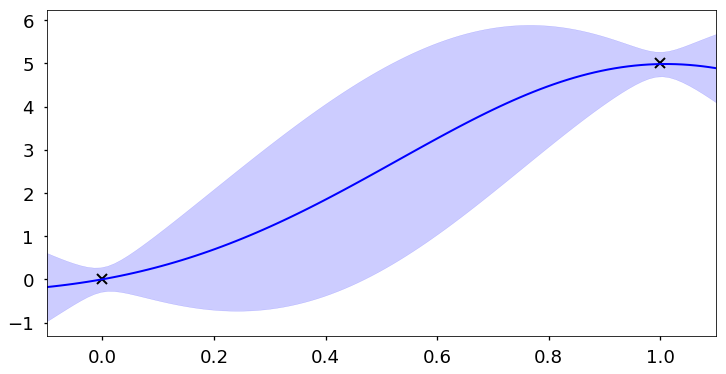

In [37]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)
plot(m)

In [42]:
samples = m.sample(500, Lmax = 20, epsilon = 0.01, thin = 5, burn = 1000, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  100.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  100.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc

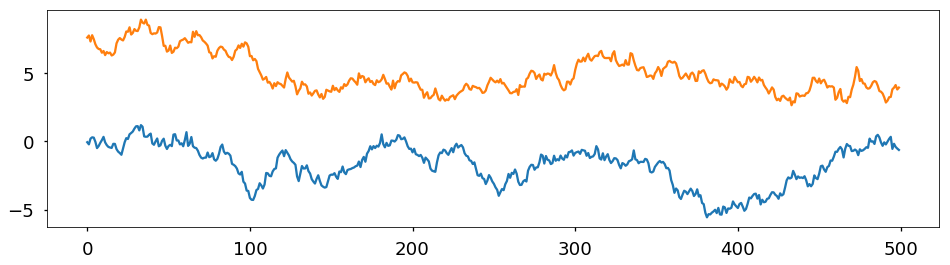

In [43]:
plt.figure(figsize=(16, 4))
plt.plot(samples)

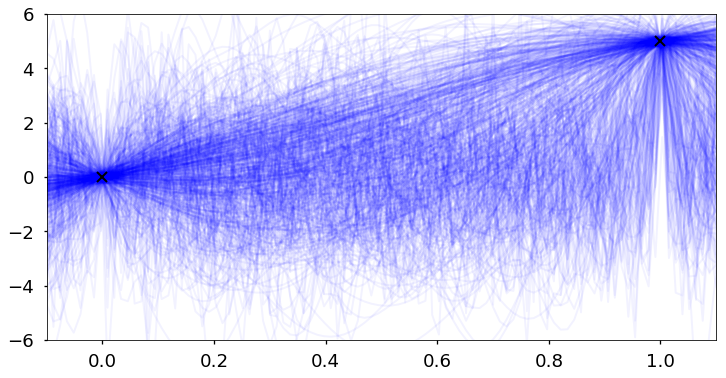

In [45]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 1)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-6, 6)

In [41]:
a = []
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    kk = m.kern
    a.append(kk)

In [25]:
a[0]

Name,values,prior,constraint
kern.lengthscales,[0.92352713],"Ga([1.],[1.])",+ve
kern.variance,[3.91997918],"Ga([1.],[1.])",+ve


500